### END TO END HEART DISEASE CLASSIFICATION
This project is an attempt to build a heart disease classification model based on their medical history. We've used various python libraries to facilitate this task.

In [1]:
#ImportingLibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ModelsWhichWeWouldNeed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#MoreTools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve


In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis(EDA)

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, 'Frequency')

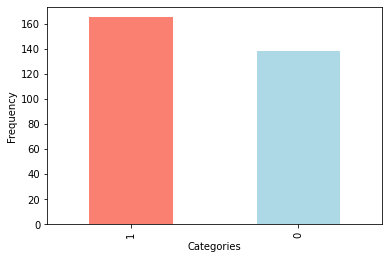

In [4]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])
plt.xlabel("Categories")
plt.ylabel("Frequency")

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

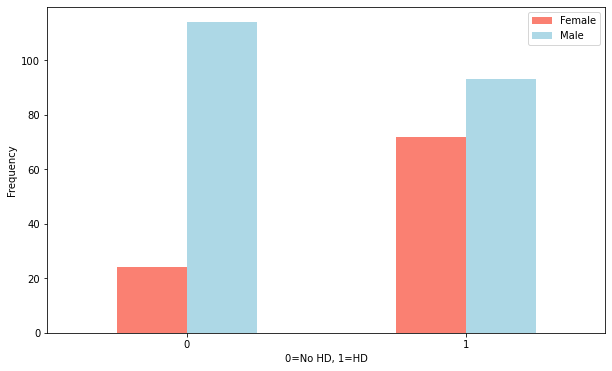

In [8]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.xlabel("0=No HD, 1=HD");
plt.ylabel("Frequency");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Observational Analysis
#### Highly based on our present dataset
About 75% women would have chance of having a heart disease
About 50% men would have chance of having a heart disease
And in general,
62% chance anyone would have heart disease
However, our dataset hints at around 55% chance
Thus, by just having a bird'eye view we could reasonably well predict heart disease probability in a general person


In [9]:
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

In [10]:
df["thalach"].value_counts()


162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

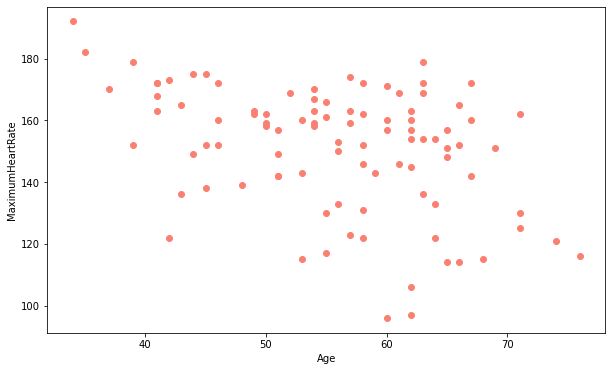

In [11]:
plt.figure(figsize=(10,6));
x=df.age[df.sex==0];
y=df.thalach[df.sex==0]
plt.scatter(x,y,color="salmon");
plt.xlabel("Age");
plt.ylabel("MaximumHeartRate");

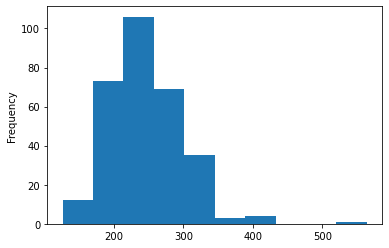

In [12]:
df.chol.plot.hist();

In [13]:
corr_mat=df.corr()

In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import seaborn as sns

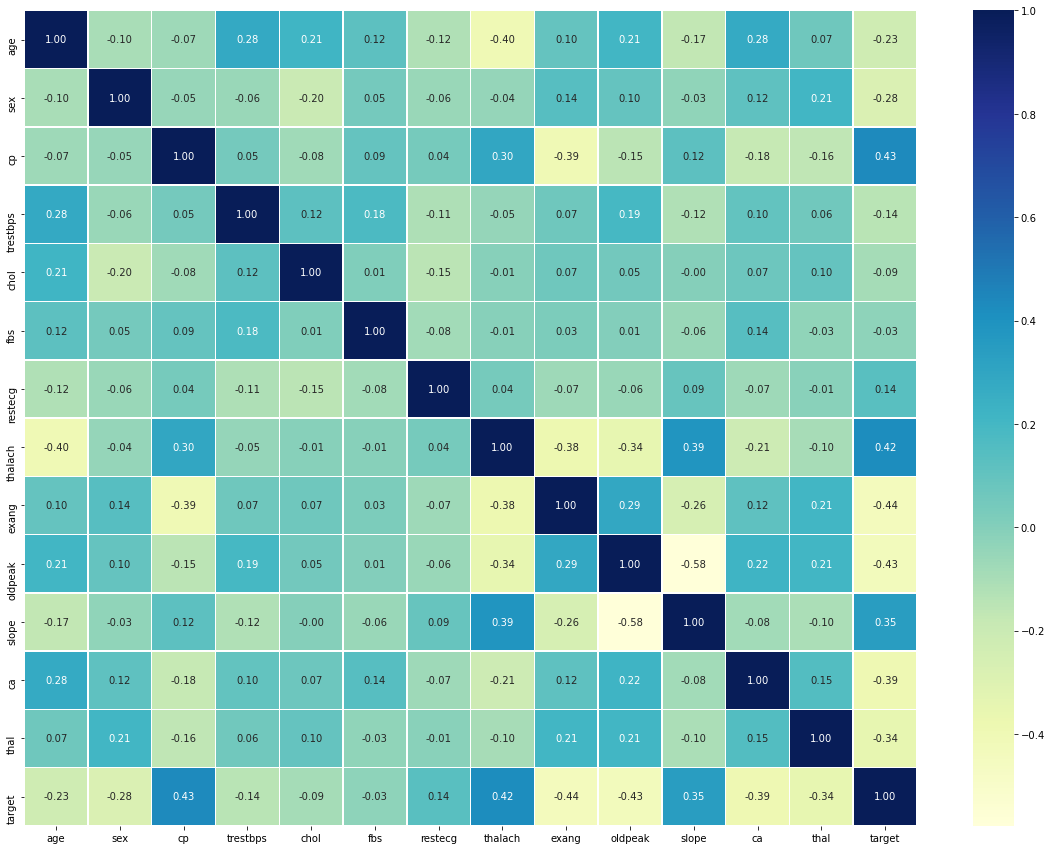

In [16]:
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(corr_mat,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu");

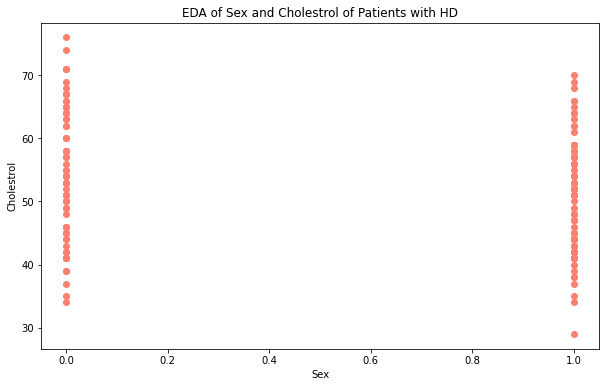

In [17]:
fig,ax = plt.subplots(figsize=(10,6))
x=df.sex[df.target==1]
y=df.age[df.target==1]
plt.scatter(x,y,color=["salmon"]);
plt.xlabel("Sex")
plt.ylabel("Cholestrol")
plt.title("EDA of Sex and Cholestrol of Patients with HD");

## MODELLING

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X=df.drop("target",axis=1)
y=df.target

## Splitting Our Data

In [20]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Going to try 3 diff.models
1) Logistic Regression
2) K Nearest Neigbor Classifier
3) Random Forest Classifier

In [21]:
models = { "Logistic Regression": LogisticRegression(),
           "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

In [53]:
def Model_Development_And_Evaluation(models,X_train,X_test,y_train,y_test):
    model_scores={}
    np.random.seed(42)
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

model_scores=Model_Development_And_Evaluation(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

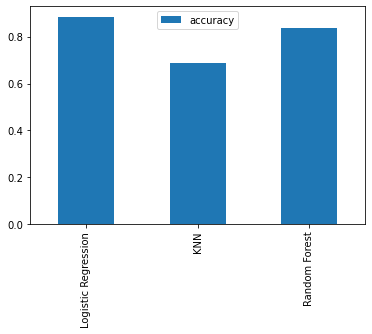

In [23]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

### HyperParamter Tuning
#### 1) We now have a baseline model
#### 2) We need to dive into:
##### Hyper-Paramter Tuning
##### Feature Importance
##### Confusion Matrix
##### Cross validation
##### Precision 
##### Recall
##### F1 Score
##### Classification Report
##### ROC Curve
##### Area Under Curve(AUC)

In [24]:
# Improving on our KNN Model
train_score=[]
test_score=[]
knn=KNeighborsClassifier()
neighbours=range(1,31)
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [25]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869]

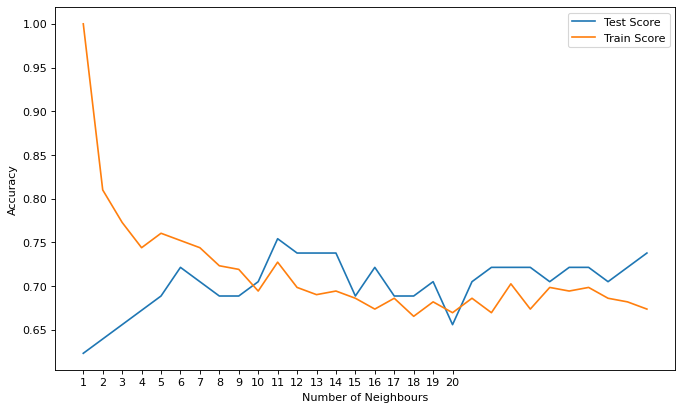

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbours, test_score,label="Test Score")
plt.plot(neighbours, train_score, label="Train Score")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21,1))
plt.legend();

In [27]:
print(f"Max. KNN Score is: {max(test_score)*100:.2f}%");

Max. KNN Score is: 75.41%


## HYPERPARAMETER TUNING USING RANDOMIZED SEARCH CV

In [28]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "dual":[True,False],
               "penalty": ["l1", "l2", "elasticnet", "none"],
               "solver":["liblinear"],
               "fit_intercept":[True]}
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,2,20)}



### Randomized Search CV

In [29]:

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklear

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Un

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'fit_intercept': True,
 'dual': False,
 'C': 4.281332398719396}

In [31]:
rs_log_reg.score(X_test,y_test), model_scores

(0.8688524590163934,
 {'Logistic Regression': 0.8852459016393442,
  'KNN': 0.6885245901639344,
  'Random Forest': 0.8360655737704918})

In [32]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                        n_iter=20,
                         cv=5,
                         verbose=True
                        )
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [34]:
rs_rf.best_params_


{'n_estimators': 610,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 3}

## GridSearch CV

In [35]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'dual': [True, False],
 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['liblinear'],
 'fit_intercept': [True]}

In [36]:
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklear

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-pack

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ndaga\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-t

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'dual': [True, False], 'fit_intercept': [True],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [38]:
gs_log_reg.best_params_

{'C': 0.23357214690901212,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluation
* ROC and AUC curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

In [40]:
y_preds=gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

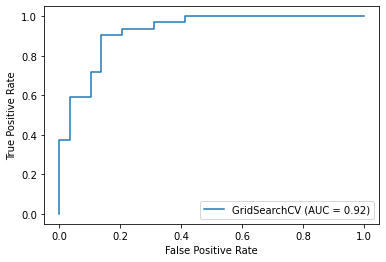

In [42]:
plot_roc_curve(gs_log_reg,X_test,y_test);

In [43]:
cf=confusion_matrix(y_test,y_preds)

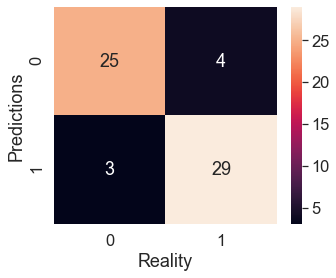

In [44]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.heatmap(cf,annot=True);
plt.xlabel("Reality")
plt.ylabel("Predictions");

In [45]:
print(classification_report(y_test,y_preds));

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
gs_log_reg.best_params_

{'C': 0.23357214690901212,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [47]:
new_log_reg=LogisticRegression(C=0.23357214690901212,fit_intercept=True,penalty="l2",solver="liblinear")

In [48]:
cv_acc=cross_val_score(new_log_reg,X,y,cv=5,scoring="accuracy")
cv_acc
mean_acc=np.mean(cv_acc)
mean_acc

0.8479781420765027

In [49]:
cv_prec=cross_val_score(new_log_reg,X,y,cv=5,scoring="precision")
mean_prec=np.mean(cv_prec)
mean_prec

0.8215873015873015

In [50]:
cv_recall=cross_val_score(new_log_reg,X,y,cv=5,scoring="recall")
mean_recall =np.mean(cv_recall)
mean_recall

0.9272727272727274

In [51]:
cv_f1=cross_val_score(new_log_reg,X,y,cv=5,scoring="f1")
mean_f1=np.mean(cv_f1)
mean_f1

0.8705403543192143

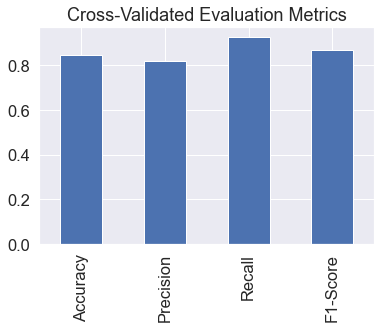

In [52]:
cv_evaluation=pd.DataFrame({"Accuracy":mean_acc,
                           "Precision":mean_prec,
                           "Recall":mean_recall,
                           "F1-Score":mean_f1},
                          index=[0])
cv_evaluation.T.plot.bar(title="Cross-Validated Evaluation Metrics",legend=False);